In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import re
from matplotlib.colors import LogNorm
import statsmodels
import statsmodels.api as sm
from matplotlib.image import NonUniformImage

In [4]:
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.size'] = 14
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['figure.figsize'] = [8.0,6.0]

In [5]:
slim_data = pd.read_csv("../simulations/results_Dec2023/summary_df_recap_dec2023.tsv", sep="\t")
slim_data = slim_data[slim_data['f_per_kb'] != 0]
freqs_all_s_001 = pd.read_csv("../simulations/results_Dec2023/slim_sims_structure/all_variants_s0.001.tsv", sep="\t")  
freqs_all_s_01 = pd.read_csv("../simulations/results_Dec2023/slim_sims_structure/all_variants_s0.01.tsv", sep="\t")  
freqs_all_s_1 = pd.read_csv("../simulations/results_Dec2023/slim_sims_structure/all_variants_s0.1.tsv", sep="\t")  

freqs_all_s_001.columns = [re.sub(r'^[a-zA-Z]*', '', col) for col in freqs_all_s_001.columns]
freqs_all_s_01.columns = [re.sub(r'^[a-zA-Z]*', '', col) for col in freqs_all_s_01.columns]
freqs_all_s_1.columns = [re.sub(r'^[a-zA-Z]*', '', col) for col in freqs_all_s_1.columns]


In [6]:
color_palette_original = [
    "#003f5c",
    "#2f4b7c",
    "#665191",
    "#a05195",
    "#d45087",
    "#f95d6a",
    "#ff7c43",
    "#ffa600"
]
colors = [color_palette_original[1],color_palette_original[6]]

[6.123724356957945, 45.31556024148879]


<ipython-input-7-2b158eef9c21>:29: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  axs[0,i].plot(sfs_temp['allele counts'][3:], sfs_temp['f_per_kb'][3:], color=col_temp, label=lab_temp, marker='o', markersize=marker_size, linewidth=line_width)


CPU times: user 241 ms, sys: 1.67 ms, total: 242 ms
Wall time: 243 ms
CPU times: user 183 ms, sys: 2.21 ms, total: 186 ms
Wall time: 188 ms


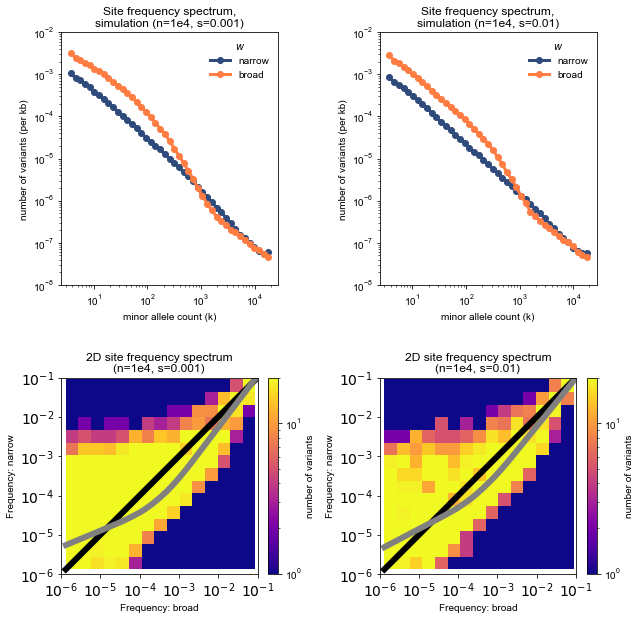

In [7]:

# Filter data
slim_data_s_001 = slim_data[slim_data['s'] == -0.001]
slim_data_s_01 = slim_data[slim_data['s'] == -0.01]
slim_data_s_1 = slim_data[slim_data['s'] == -0.1]

# Settings
fig, axs = plt.subplots(2, 2, figsize=(9, 9))
marker_size = 6  # Increased slightly
line_width = 3   # Increased slightly

sig_vals_slim = slim_data_s_01['width'].unique()
sig_vals_slim = np.sort(sig_vals_slim)
vals_to_plot = [sig_vals_slim[5],sig_vals_slim[-4]]
# vals_to_plot = [sig_vals_slim[4], sig_vals_slim[-4]]
print(vals_to_plot)

s_list = [0.001, 0.01]
nval = 1000
kmax=1000
step=1

# Plot simulations
for i, sfs_data in enumerate([slim_data_s_001, slim_data_s_01]):
    for width in vals_to_plot:
        sfs_temp = sfs_data[sfs_data['width'] == width]
        col_temp = colors[0] if width == vals_to_plot[0] else colors[1]
        lab_temp = "narrow" if width == vals_to_plot[0] else "broad"
        
        axs[0,i].plot(sfs_temp['allele counts'][3:], sfs_temp['f_per_kb'][3:], color=col_temp, label=lab_temp, marker='o', markersize=marker_size, linewidth=line_width)
        axs[0,i].set_xscale("log")
        axs[0,i].set_yscale("log")
        axs[0,i].set_ylim(1e-8, 1e-2)
        axs[0,i].set_title("Site frequency spectrum,\nsimulation (n=1e4, s="+str(s_list[i])+")")
        axs[0,i].set_xlabel("minor allele count (k)")
        axs[0,i].set_ylabel("number of variants (per kb)")
        axs[0,i].legend(title=r"$w$", frameon=False)
    
# Limits
lower_limit = 1e-6
upper_limit = 1e0
samps = ['narrow','broad']

nbins = 15

global_min_xvals = 1e6
global_max_xvals = -1e6
global_min_yvals = 1e6
global_max_yvals = -1e6

for freq_data in [freqs_all_s_001, freqs_all_s_01]:
    freqs_pos = freq_data.rename(columns={str(vals_to_plot[0]): 'narrow', str(vals_to_plot[1]): 'broad'})
    
    # Filter data based on the limits
    filtered_freqs_pos = freqs_pos[
        (freqs_pos['narrow'] >= lower_limit) & (freqs_pos['narrow'] <= upper_limit) & 
        (freqs_pos['broad'] >= lower_limit) & (freqs_pos['broad'] <= upper_limit)
    ]
    yvals = [np.log10(y) for y in filtered_freqs_pos['narrow']]
    xvals = [np.log10(x) for x in filtered_freqs_pos['broad']]
    
    global_min_xvals = min(global_min_xvals, min(xvals))
    global_max_xvals = max(global_max_xvals, max(xvals))
    global_min_yvals = min(global_min_yvals, min(yvals))
    global_max_yvals = max(global_max_yvals, max(yvals))

xedges = np.linspace(global_min_xvals, global_max_xvals, nbins+1)
yedges = np.linspace(global_min_yvals, global_max_yvals, nbins+1)

for i, freq_data in enumerate([freqs_all_s_001, freqs_all_s_01]):
    freqs_pos=freq_data.rename(columns={str(vals_to_plot[0]):'narrow',str(vals_to_plot[1]):'broad'})
    # Filter data based on the limits
    filtered_freqs_pos = freqs_pos[
        (freqs_pos['narrow'] >= lower_limit) & (freqs_pos['narrow'] <= upper_limit) & 
        (freqs_pos['broad'] >= lower_limit) & (freqs_pos['broad'] <= upper_limit) 
    ]
    yvals = [np.log10(y) for y in filtered_freqs_pos['narrow']]
    xvals = [np.log10(x) for x in filtered_freqs_pos['broad']]
    xrange = (min(xvals), max(xvals))
    yrange = (min(yvals), max(yvals))
    hist, _,_ = np.histogram2d(y=yvals,x=xvals,bins=(yedges,xedges))
    
    hist[hist == 0] = 0.99  # Use a value slightly less than your vmin (1) to ensure it gets the darkest color

    norm = LogNorm(vmin=1, vmax=20)
    cmap = plt.get_cmap('plasma')
    cmap.set_under(cmap(0))
    
    c = axs[1,i].pcolormesh(xedges, yedges, hist, cmap=cmap, norm=norm)#,vmin=global_min, vmax=global_max)
    # Add a colorbar
    plt.colorbar(c, ax=axs[1,i],label="number of variants",fraction=0.045,pad=0.05)
    axs[1,i].set_xlim(global_min_xvals, global_max_xvals)
    axs[1,i].set_ylim(global_min_yvals, global_max_yvals)
    axs[1,i].set_aspect('equal')
    axs[1,i].set_ylabel('Frequency: '+samps[0])
    axs[1,i].set_xlabel('Frequency: '+samps[1])
    min_val = min(axs[1,i].get_xlim()[0], axs[1,i].get_ylim()[0])
    max_val = max(axs[1,i].get_xlim()[1], axs[1,i].get_ylim()[1])
    axs[1,i].plot([min_val, max_val], [min_val, max_val], color='black', linestyle='-',linewidth=6)
    %time lowess = sm.nonparametric.lowess(yvals,xvals,frac=0.667)
    axs[1,i].plot(lowess[:,0], lowess[:,1], color='gray',linewidth=6)
    tick_positions = [-6,-5,-4, -3,-2, -1]  # For 10^-4, 10^-3, ..., 10^0
    xticks = tick_positions
    yticks = tick_positions
    # Determine labels based on tick positions
    xticklabels = [f"$10^{{{int(val)}}}$" for val in xticks]
    yticklabels = [f"$10^{{{int(val)}}}$" for val in yticks]
    axs[1,i].set_xticks(xticks)
    axs[1,i].set_yticks(yticks)
    axs[1,i].set_xticklabels(xticklabels,fontsize=14)
    axs[1,i].set_yticklabels(yticklabels,fontsize=14)
    axs[1,i].set_title("2D site frequency spectrum\n(n=1e4, s="+str(s_list[i])+")")
    
    
# # print(min_val)
plt.tight_layout()
# plt.show()
plt.savefig("sim_fig2_heatmaps.pdf")    
    

# plt.tight_layout()
# plt.savefig("sim_fig2_sfs.pdf")

<ipython-input-13-e3696c2be0be>:25: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  unif_vec = sfs_data[sfs_data['width'] == vals_to_plot[1]]['f_per_kb'][0:45]
<ipython-input-13-e3696c2be0be>:26: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  narrow_vec = sfs_data[sfs_data['width'] == vals_to_plot[0]]['f_per_kb'][0:45]
<ipython-input-13-e3696c2be0be>:27: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated 

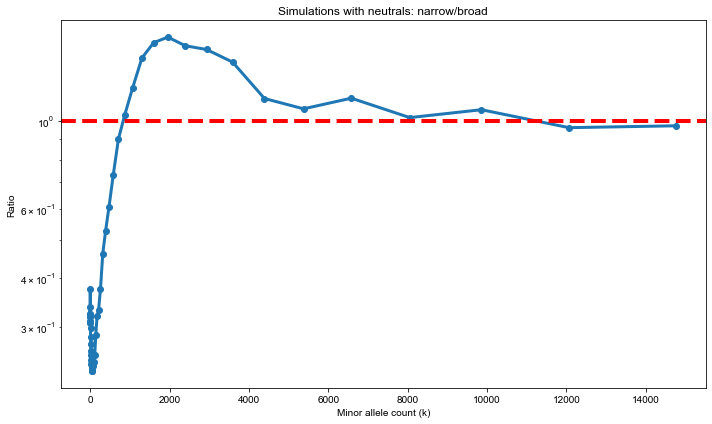

In [13]:

# slim_data = pd.read_csv("../simulations/results_Dec2023/summary_df_norecap_dec2023.tsv", sep="\t")
# slim_data = slim_data[slim_data['f_per_kb'] != 0]

# slim_data_s_05 = slim_data[slim_data['s'] == -0.1]
# slim_data_s_005 = slim_data[slim_data['s'] == -0.01]
# slim_data_s_0005 = slim_data[slim_data['s'] == -0.001]

# w_vals_slim = slim_data_s_05['width'].unique()
# w_vals_slim = np.sort(w_vals_slim)
# vals_to_plot = [w_vals_slim[5],w_vals_slim[-4]]

mu = 1e-10
nval = 1000
dens = 4/(1/.06)
Dval = 1
s_list = [0.01,0.001]
kmax=1000
step=1

colors = [color_palette_original[1],color_palette_original[6]]
    
sfs_data = slim_data_s_001   
    
fig,ax = plt.subplots(figsize=(10,6))
unif_vec = sfs_data[sfs_data['width'] == vals_to_plot[1]]['f_per_kb'][0:45]
narrow_vec = sfs_data[sfs_data['width'] == vals_to_plot[0]]['f_per_kb'][0:45]
xax = sfs_data['allele counts'][0:45]
ratio = np.array(narrow_vec)/np.array(unif_vec)
plt.plot(xax, ratio,label='narrow',marker='o')
plt.axhline(y=1, color='r', linestyle='--', label=None,linewidth=4)
plt.yscale('log')

plt.xlabel("Minor allele count (k)")
plt.ylabel("Ratio")
plt.title("Simulations with neutrals: narrow/broad")

plt.tight_layout()
# plt.show()
plt.savefig("counts_ratio_sims_recap.pdf")